#### 计算均匀矩形介质中的走时场

In [1]:
import pyfmm
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Uncomment and Run following to remove WARNING.
# 
# import logging
# pyfmm.myLogger.setLevel(logging.ERROR)

In [3]:
xarr = np.arange(0, 100, 0.08)
yarr = np.arange(0, 50, 0.05)
zarr = np.array([0.0])  # 二维情况

# 慢度场
slw  = np.ones((len(xarr), len(yarr), len(zarr)), dtype='f')

srcloc = [10, 20, 0.0]

# FMM解
FMMTT = pyfmm.travel_time_source(
    srcloc,
    xarr, yarr, zarr, slw)

# FSM解
FSMTT = pyfmm.travel_time_source(
    srcloc,
    xarr, yarr, zarr, slw, useFSM=True)

# 真实解
xx, yy, zz = srcloc
real_TT = np.sqrt(((xarr-xx)**2)[:,None,None] + ((yarr-yy)**2)[None,:,None] + ((zarr-zz)**2)[None,None,:])

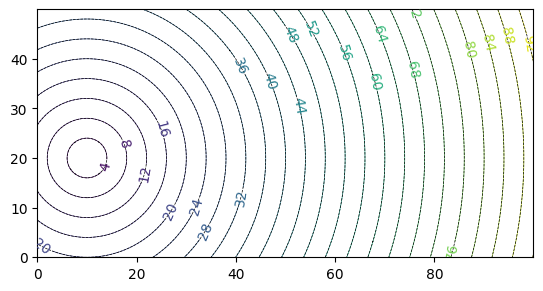

In [4]:
fig, ax = plt.subplots(1, 1)
cs = ax.contour(xarr, yarr, FMMTT[:, :, 0].T, levels=30, linewidths=0.5)
_  = ax.contour(xarr, yarr, real_TT[:, :, 0].T, levels=30, linewidths=0.5, colors='k', linestyles='--')
ax.clabel(cs)

ax.set_aspect('equal')

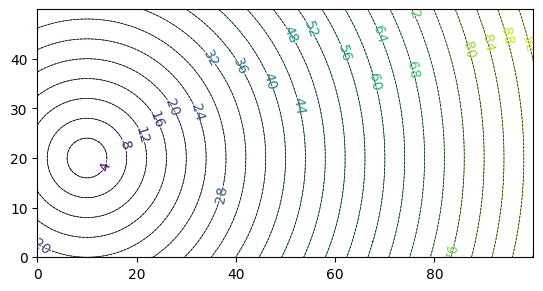

In [5]:
fig, ax = plt.subplots(1, 1)
cs = ax.contour(xarr, yarr, FSMTT[:, :, 0].T, levels=30, linewidths=0.5)
_  = ax.contour(xarr, yarr, real_TT[:, :, 0].T, levels=30, linewidths=0.5, colors='k', linestyles='--')
ax.clabel(cs)

ax.set_aspect('equal')

In [6]:
# 误差 
FMM_error = np.mean(np.abs(FMMTT - real_TT))
FSM_error = np.mean(np.abs(FSMTT - real_TT))
print("FMM_error = ", FMM_error)
print("FSM_error = ", FSM_error)

FMM_error =  0.009092051242207444
FSM_error =  0.009115207963152972
